# **CSE655 Homework 3**

* **GTU Artificial Intelligence MSc.**
* **Student Name:** Berkin Barış Yılmaz
* **ID:** 244201001109

## **Part 1: Prediction with LSTM**

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# Extract the data
dates = []
tsla_open = []
tsla_high = []
tsla_low = []
tsla_close = []
tsla_adj = []
tsla_volume = []

with open("Homework3 - TSLA.csv", "r") as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        dates.append(row[0])
        tsla_open.append(float(row[1]))
        tsla_high.append(float(row[2]))
        tsla_low.append(float(row[3]))
        tsla_close.append(float(row[4]))
        tsla_adj.append(float(row[5]))
        tsla_volume.append(float(row[6]))

In [3]:
class Data1D:
    def __init__(self, name:str, data:list):
        self.name = name
        self.data = data
        self.max_x = max(data)
        self.min_x = min(data)

    def normalized(self)->list:
        return [(x - self.min_x) / (self.max_x - self.min_x) for x in self.data]

    def denormalize(self, new:list)->list:
        return [x * (self.max_x - self.min_x) + self.min_x for x in new]


In [4]:
tsla = {
    "Open"   : Data1D("Open", tsla_open),
    "Close"  : Data1D("Close", tsla_close),
    "High"   : Data1D("High", tsla_high),
    "Low"    : Data1D("Low", tsla_low),
    "Adj"    : Data1D("Adj", tsla_adj),
    "Volume" : Data1D("Volume", tsla_volume)
}

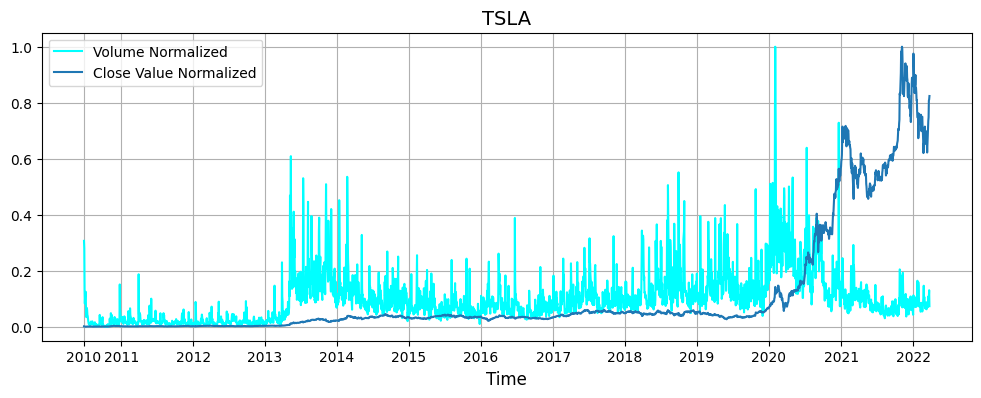

In [8]:
years = [date[:4] for date in dates] 
unique_years = sorted(set(years))
xticks_positions = [years.index(year) for year in unique_years]

plt.figure(figsize=(12, 4))
plt.plot(tsla["Volume"].normalized(), label="Volume Normalized", color="cyan")
plt.plot(tsla["Close"].normalized(), label="Close Value Normalized")

plt.title("TSLA", fontsize=14)
plt.xlabel("Time", fontsize=12)

plt.xticks(xticks_positions, unique_years)
plt.legend()
plt.grid(True)
plt.show()

In [9]:
def sequencer(data, interval=10):
    """
    Creates windowed data pieces for training and validation.
    X (Input)  = [i, i+1, i+2 ... interval - 1] 
    Y (Output) = [interval]

    @param data: Time sequenced data set
    @param interval: Window size  
    @return: np.array X, Y 
    """
    X, Y = [], []
    for i in range(len(data) - interval):
        X.append(data[i:i + interval])
        Y.append(data[i + interval])
    return np.array(X), np.array(Y)

In [10]:
interval = 20
data = tsla["Close"].normalized()

X, Y = sequencer(data, interval)

# Training & Validation sets (%70 train, %30 validation)
split_index = int(0.7 * len(X))
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = Y[:split_index], Y[split_index:]

TypeError: object of type 'Data1D' has no len()